In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

Prepare data

In [5]:
#unzip the zip file
import zipfile

zip_file_path = '../Data/clf-data.zip'
extract_dir = '../Data/Dataset'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Zip file '{zip_file_path}' extracted to '{extract_dir}'")

Zip file '../Data/clf-data.zip' extracted to '../Data/Dataset'


In [6]:
input_dir = '../Data/Dataset/clf-data'
categories = ['empty', 'not_empty']

In [7]:
#load data

data = []
labels = []

for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir, category)):
    img_path = os.path.join(input_dir, category, file)
    img = imread(img_path)
    img = resize(img, (15,15))
    data.append(img.flatten())
    labels.append(category_idx)

data = np.asarray(data)
labels = np.asarray(labels)

Split the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, shuffle=True, stratify=labels )

Training (PCA)

In [9]:
# Fit PCA on training data
pca = PCA(n_components=2)
pca.fit(X_train)

# Transform both train and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Visualisation des données projetées par PCA

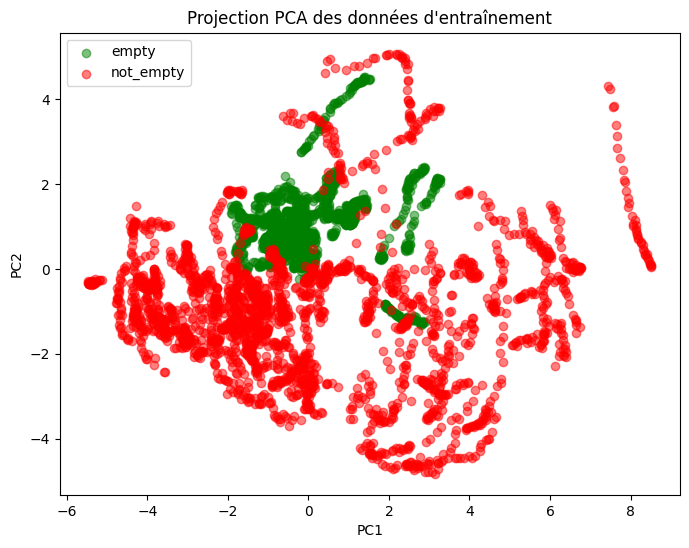

In [11]:
plt.figure(figsize=(8,6))
for label, color, name in zip([0,1], ['green', 'red'], ['empty', 'not_empty']):
    plt.scatter(X_train_pca[y_train==label, 0], X_train_pca[y_train==label, 1],
                label=name, alpha=0.5, c=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Projection PCA des données d\'entraînement')
plt.show()

Vous pouvez utiliser les composantes principales comme features pour un autre classifieur si besoin.